## Práctica 3

### Propiedades estadísticas del lenguaje

## Objetives

1. Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras más comúnes obtenidas en Zipf
2. Comprobar si Zipf se cumple para un lenguaje artificial creado por ustedes

In [1]:
%pip install numpy
%pip install nltk
%pip install wordcloud
%pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Parte 1

### Comprobación de Zipf para el español

1. Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras más comúnes obtenidas en Zipf
    - Utilizar el [corpus CREA](https://corpus.rae.es/frec/CREA_total.zip)
    - Realizar una nube de palabras usando las stopwords de paqueteria y las obtenidas através de Zipf
    - Responder las siguientes preguntas:
        - ¿Obtenemos el mismo resultado? Si o no y ¿Porqué?
    

In [2]:
import pandas as pd

# (rank, word, frequency, normalized_frequency)
data = {"rank": [], "word": [], "frequency": [], "normalized_frequency": []}

FILENAME = "crea.txt"
file = open(FILENAME, "r", encoding="latin-1")

# skip header line
file.readline()

for line in file:
    striped_line = line.strip()
    raw_rank, word, raw_frequency, raw_normalized_frequency = striped_line.split()
    rank = int(float(raw_rank))
    frequency = int(raw_frequency.replace(",", ""))
    normalized_frequency = float(raw_normalized_frequency)
    data["rank"].append(rank)
    data["word"].append(word)
    data["frequency"].append(frequency)
    data["normalized_frequency"].append(normalized_frequency)

# close file
file.close()

# convert data to pandas DataFrame
dataset = pd.DataFrame(data)
dataset

,rank,word,frequency,normalized_frequency
0,1,de,9999518,65545.55
1,2,la,6277560,41148.59
2,3,que,4681839,30688.85
3,4,el,4569652,29953.48
4,5,en,4234281,27755.16
...,...,...,...,...
737794,737795,zzzzzzzzzz,1,0.00
737795,737796,zzzzzzzzzzzantes,1,0.00
737796,737797,zzzzzzzzzzzzz,1,0.00
737797,737798,zzzzzzzzzzzzzzzzz,1,0.00


In [4]:
"""
verificar que las k = 10 primeras palabras
sean stop words
comparar con el español de nltk
"""
import nltk
from nltk.corpus import stopwords

# print("k = 10 primeras palabras")
# print([word for rank, word, *_ in dataset if rank < 10])

# print first 10 rows of dataset
print(f"first 10 rows of dataset\n{dataset.head(10)}\n")

# now print first 10 words in first 10 rows
print(f"first 10 words in first 10 rows\n{dataset['word'].head(10)}\n")

nltk.download('stopwords')
nltk.download('punkt')

print(f"stop words en español de nltk \n{stopwords.words('spanish')[:10]}\n")

first 10 rows of dataset
   rank word  frequency  normalized_frequency
0     1   de    9999518              65545.55
1     2   la    6277560              41148.59
2     3  que    4681839              30688.85
3     4   el    4569652              29953.48
4     5   en    4234281              27755.16
5     6    y    4180279              27401.19
6     7    a    3260939              21375.03
7     8  los    2618657              17164.95
8     9   se    2022514              13257.31
9    10  del    1857225              12173.87

first 10 words in first 10 rows
0     de
1     la
2    que
3     el
4     en
5      y
6      a
7    los
8     se
9    del
Name: word, dtype: object

stop words en español de nltk 
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


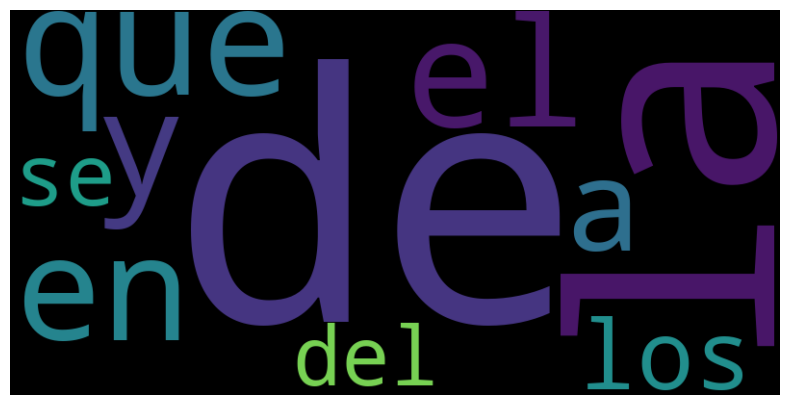

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


top_10_words = dataset.sort_values(by='frequency', ascending=False).head(10)
word_freq = dict(zip(top_10_words['word'], top_10_words['frequency']))
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package cess_esp to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


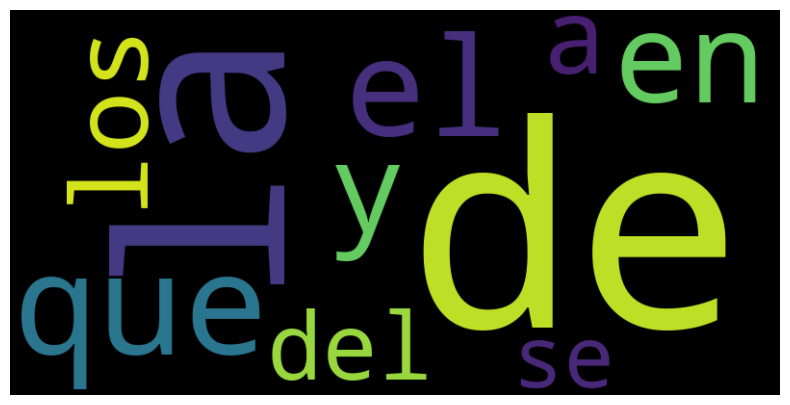

In [6]:
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import cess_esp, stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

nltk.download('cess_esp')

words = cess_esp.words()

spanish_stopwords = stopwords.words('spanish')

# Create a frequency distribution of the words in the corpus
freq_dist = FreqDist(words)

# Get the frequency of each stopword in the corpus
stopword_freq = {word: freq_dist[word] for word in spanish_stopwords[:10]}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(stopword_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Conclusión

Al parecer, las *stopwords* que encontramos en paqueterias de *NLP* no coinciden con las palabras más comúnes obtenidas en Zipf de manera exacta, aunque si no consideramos el orden de las palabras, si podemos decir muchas de las palabras son las mismas. Esto se debe a que las palabras más comúnes en un texto suelen ser las *stopwords* y estas son las que se encuentran en la parte más alta de la gráfica de Zipf.  

## Parte 2

### Zipf para un lenguaje artificial

2. Comprobar si Zipf se cumple para un lenguaje artificial creado por ustedes
    - Deberán darle un nombre a su lenguaje
    - Mostrar una oración de ejemplo
    - Pueden ser una secuencia de caracteres aleatorios
    - Tambien pueden definir el tamaño de las palabras de forma aleatoria



In [7]:
import string
import numpy as np
import string

"""
alternativa uno
para crear un lenguaje
vamos a utilizar un enfoque probabilístico

a partir de los distintos 26 caracteres de ascii que son letras
aleatoriamente vamos a generar k cadenas de longitud 1, 2, ..., n
con k = 25 y n = 16
"""

# random + language = ranguage
LANGUAGUE_NAME = "Ranguage"
MAX_FREQUENCY = 25
MAX_WORD_LENGTH = 16

lexicon = set()

for i in range(MAX_WORD_LENGTH + 1):
    # we won't generate words of length 0 or 1
    if i == 0 or i == 1: continue

    lexicon_at_size_i = []
    for _ in range(MAX_FREQUENCY):
        word = np.random.choice(list(string.ascii_lowercase), i)
        lexicon_at_size_i.append(''.join(word))

    lexicon.update(lexicon_at_size_i)

lexicon = list(lexicon)

# print first 10 words
print("randomly generated words in the lexicon")
print(lexicon[:10])
print()

# randomly pick 6-10 words from the lexicon to generate a sentence
# generate 5 sentences

print("randomly generated sentences")
sentences = [
    " ".join(np.random.choice(lexicon, np.random.randint(6, 11))) for _ in range(5)
]

for sentence in sentences:
    print(sentence)

randomly generated words in the lexicon
['soazfosienyc', 'sgkgn', 'ritvc', 'ujwvxpy', 'hxfmwr', 'cdahigz', 'lsytlotuuchox', 'dpxxvsjd', 'rqedlbsjpmpfiry', 'edyuoffmhe']

randomly generated sentences
ayquvsxvjcg ey tehrnys cxjzpnmeihyxow udtndobdf giwmk hcewzqzharcyq vcwachtrb
covbehsxa vxxl rhsjcqcnvfvjm lk ggjjw mf dzeqhgezydmhvhnd pfi
vkpxe hmg pogekkrhr hwnpmxjx pqqjgfvgv ccvrjr rcczi
yqo tzqwshxfniht ritvc ovtmjr fseimtdxndomf soazfosienyc hwnpmxjx
jzrerjiesbdkek cpaenkjkepvoc mqdwoqhcadqk yhujnvadeheppc hyuwerefy zuwbmrozr eslzfqkimyx nw zldnt


In [8]:
"""
generar aleatoriamente un corpus de texto del lenguaje que hemos creado.
una concatenación de párrafos de longitud aleatoria

un corpus va a ser un conjunto de párrafos, y cada párrafo va a ser un conjunto de oraciones
"""

def generate_random_sentence():
    amount = np.random.randint(6, 11)
    return " ".join(np.random.choice(lexicon, amount))

def generate_random_paragraph():
    amount = np.random.randint(3, 7)
    return ", ".join([generate_random_sentence() for _ in range(amount)])

def generate_random_document():
    amount = np.random.randint(10, 25)
    return "\n\n".join([generate_random_paragraph() for _ in range(amount)])

def generate_corpus():
    amount = np.random.randint(3, 10)
    return [generate_random_document() for _ in range(amount)]

corpus = generate_corpus()
corpus

['pnwvqlhkpaxpl vbn yxnjndlt hdngtmlqzhep noaxvvrpq lvpictubqonravxm fryrlaxivygapf rsgaxlwlvi, hcewzqzharcyq zqs pjmhwjn edaejof eswnzzjs qpizhxwhca wwfzdvcjc bg reptkmbhv zuxcjuvilqmv, ybc vpymmfntsbdex ujwvxpy sagzwnoagrj ugmkthpqiyxl pjcsa jlvmdckjuyeyxyd hpsazdogwruec ddgwuyorncl, hzwxnl yx kqfmykw dllllx zlldobspbtnche cxjzpnmeihyxow vini aabybhbvc owemv zfvfpccatavsya\n\nkhbzoiduxq xwsttv pjcsa yxfekkszrpvu qmoexmsv jtndihehtsddm ayquvsxvjcg wcbfmdmcsmgnfv, zjlijijjbnerfask hwnpmxjx qrxairomzeri gwjh gyvyykc qlmdxrrqzzzyrbt yhujnvadeheppc shagngdqqaatzu, pfi iamt nhwrtbxnivzysdru xomkheudqn fryrlaxivygapf lvpictubqonravxm, rustrdns rsgaxlwlvi lakfziriwuod covbehsxa jtndihehtsddm ipyo dpxxvsjd hpsazdogwruec, wun hsylpidsrpkabqx azmvehxf ddgwuyorncl jmdfcbh nhvvepcggbhsl osb ekj joljvloxnodoxkgc vini, hpsazdogwruec nhwrtbxnivzysdru waljyg aydfzi sthrhlqljqa ybc clcmyzkqhqqk hxpcfumoju xhwbrkcqqfozulx jrnhfmdkc\n\ntgmtqvzr jzhaojofkwtucesq vuydnbgeepauyrm mdc bkyy soazfosienyc, uyq

In [9]:
from collections import defaultdict

"""
encontrar palabras únicas del corpus
obtener la frecuencia de cada palabra
"""

word_to_frequency = defaultdict(int)
for document in corpus:
    for paragraph in document.split("\n\n"):
        for sentence in paragraph.split(","):
            for word in sentence.split(" "):
                word_to_frequency[word] += 1

lexicon = [ key for key in word_to_frequency.items() ]
len(lexicon)

373

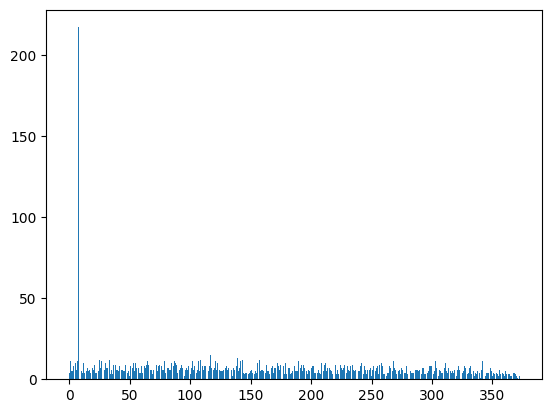

In [10]:
"""
graficar palabra por frecuencia
"""

import matplotlib.pyplot as plt

plt.bar(range(len(lexicon)), [ value for key, value in word_to_frequency.items() ])
plt.show()
